<a href="https://colab.research.google.com/github/BanuTK/Regression/blob/main/dsb32021_9w_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![grafik.png](attachment:grafik.png)

# WAIA Data Science with Python 2021 - Week 9 Exercises 

## Cancer dataset - Model validation

In [5]:
!pip install -q kaggle
!pip install -q kaggle-cli
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/ColabNotebooks/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json
# For competition datasets
!kaggle competitions download -c altavish/boston-housing-dataset -p /content/drive/MyDrive/ColabNotebooks
# For other datasets
!kaggle datasets download -d altavish/boston-housing-dataset -p /content/drive/MyDrive/ColabNotebooks

  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-jutofah3/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-jutofah3/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-__xxwks7/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.
cp: cannot stat '/content/drive/MyDrive/ColabNotebooks/kaggle.json': No such file or directory
cat: /root/.kaggle/kaggle.json: No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/pyth

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import matplotlib.dates as mpl_dates
import datetime
from datetime import datetime

#some clustering libraries
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import datasets
from itertools import cycle

from sklearn import svm, datasets
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from scipy.stats import randint
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

This exercise builds up on the work that you have been doing with the previous assigment. Let's imagine, you have already loaded and prepared the breast cancer dataset in this notebook.

## Boston housing dataset - Linear regression

After working on a classification dataset from the scikit-learn database, let's try out a new dataset to work on our linear regression skills.

Attributes:
- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

First, load the Boston housing dataset from scikit-learn. Create a DataFrame from the feature data as well as the target variable.

In [7]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df['target'] = pd.Series(data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_boston = sklearn_to_df(datasets.load_boston())

### Linear regression for one parameter

Analyse the correlation between our target variable (MEDV) and all the other features in the DataFrame. If  you were to develop a linear regression model with only one parameter (univariate), which one would this be?

In [ ]:
#5 Type code here

corr=df[['CRIM', 'ZN', 'INDUS', 'CHAS','NOX' , 'RM', 'AGE', 'DIS', 'RAD' , 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']].corr() 
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


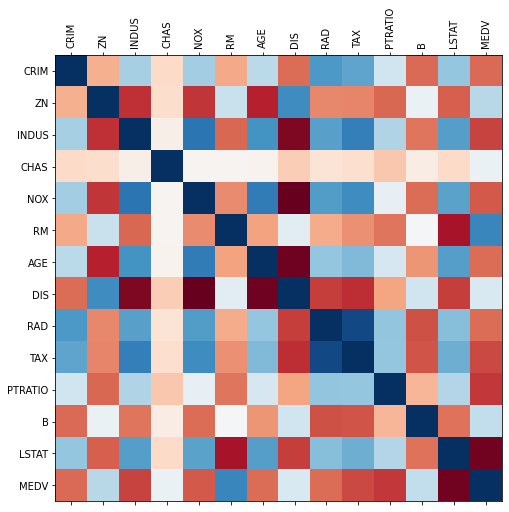

In [ ]:
fig=plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

Create a scatter plot between this variable and MEDV to visually analyse the correlation and relationship between these parameters

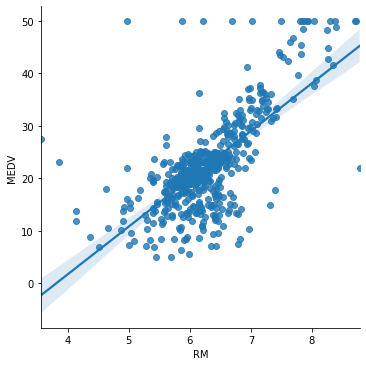

In [ ]:
#6 Type code here
sns.lmplot(x='RM', y='MEDV', data=df)

Create a linear regression model to describe the relationship between these parameters and compute the mean absolute error

In [ ]:
#7 Type code here


In [ ]:
lm = LinearRegression(fit_intercept = True)
x_data = df['LSTAT'].values.reshape(-1,1)
y_data = df['MEDV'].values.reshape(-1,1)

In [ ]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(x_data, y_data, test_size=0.2)

print(data_x_train.shape)
print(data_y_train.shape)
print(data_x_test.shape)
print(data_y_test.shape)
print(x_data.shape)
print(y_data.shape)

print(type(data_x_train))

(404, 1)
(404, 1)
(102, 1)
(102, 1)
(506, 1)
(506, 1)
<class 'numpy.ndarray'>


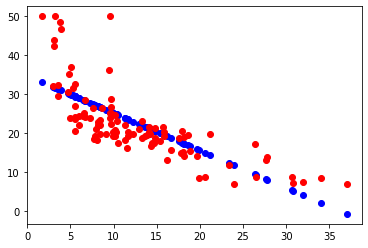

In [ ]:
lm.fit(data_x_train, data_y_train) 
prediction = lm.predict(data_x_test)
plt.scatter(data_x_test,prediction,c="blue")
plt.scatter(data_x_test,data_y_test,c="red")

In [ ]:
r2 = r2_score(data_y_test, prediction)
print("R^2 score calculated with ready function:")
print(r2)

R^2 score calculated with ready function:
0.5573567799718903


In [ ]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(data_y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(data_y_test, prediction))

Coefficients: 
 [[-0.95791434]]
Mean squared error: 37.71
Coefficient of determination: 0.56


## Multivariate linear regression 

Does the accuracy improve if you train a model with all the 

In [ ]:
#8 Type code here

In [12]:
lm = LinearRegression(fit_intercept = True)
x_data = df[['CRIM', 'ZN', 'INDUS', 'CHAS','NOX' , 'RM', 'AGE', 'DIS', 'RAD' , 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y_data = df['MEDV'].values.reshape(-1,1)
print(x_data.shape)
print(y_data.shape)

(506, 13)
(506, 1)


In [13]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(x_data, y_data, test_size=0.2)

print(data_x_train.shape)
print(data_y_train.shape)
print(data_x_test.shape)
print(data_y_test.shape)
print(x_data.shape)
print(y_data.shape)

print(type(data_x_train))

(404, 13)
(404, 1)
(102, 13)
(102, 1)
(506, 13)
(506, 1)
<class 'pandas.core.frame.DataFrame'>


In [14]:
lm.fit(data_x_train, data_y_train)
prediction = lm.predict(data_x_test)

Coefficients: 
 [[-1.23647473e-01  4.90466564e-02  2.26059054e-03  2.45346101e+00
  -1.64587809e+01  4.25676305e+00 -2.75648162e-03 -1.44160095e+00
   3.29056136e-01 -1.39059014e-02 -8.89028324e-01  9.35034098e-03
  -4.80172525e-01]]
Mean squared error: 23.02
Coefficient of determination: 0.73


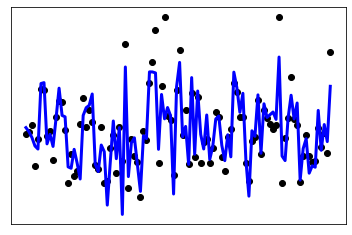

In [15]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(data_y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(data_y_test, prediction))

data_x_test=np.arange(0,len(data_x_test),1)

# Plot outputs
plt.scatter(data_x_test, data_y_test,  color='black')
plt.plot(data_x_test, prediction, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# YES IT IMPROVED !!!